In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
# Setup configs for reward and policy learning
def make_reward_cfg(n):
    reward_cfg = {
        'n_sample': n,
        'n_epoch': 40,
        'lr': 0.001,
        'verbose': True,
        'eval_freq': 100,
        'batch_size': 64,
        'split': 0.8,
        'log': False,
        'action_dim': 1,
        'layers': [5,5,5]
    }
    return reward_cfg

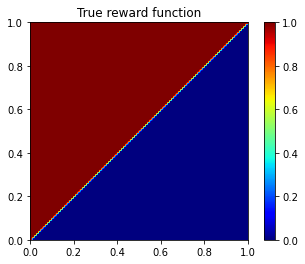

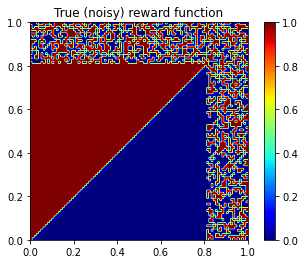

In [3]:
## Setup

n_samples = [50, 100, 150, 200, 250, 300, 350, 400]

# Create comparison function
f = lambda x: x[0]
var_1, var_2 = 0.0, 10.0
reward_fn_true = lambda x : f(x)
seed = None
np.random.seed(seed)
noise_fn = lambda x: step_noise(x[0], x_step=0.8, var_1=var_1, var_2=var_2, seed=seed)
reward_fn_true_noisy = create_reward_fn_1(f, noise_fn, seed=seed)
comparison_fn = create_comparison_fn_1(f, noise_fn, seed=seed)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(0, 1, size=(1,)) for _ in range(n)])

# Plot true reward function
vis_fn = lambda fn, title: visualize_fn_1(fn, title=title, x_range=[0,1], x_step=0.01)
vis_fn(reward_fn_true, title="True reward function")
vis_fn(reward_fn_true_noisy, title="True (noisy) reward function")

Number of samples = 50,Learning with Cross Entropy
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Training process has finished.


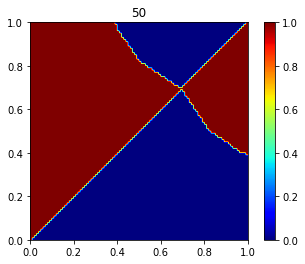

Number of samples = 100,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/157]	Train Loss: 0.6978 	Val Loss: 0.6927
Starting epoch 2
Epoch 2 [100/157]	Train Loss: 1.0798 	Val Loss: 0.6791
Starting epoch 3
Epoch 3 [100/157]	Train Loss: 1.0387 	Val Loss: 0.6415
Starting epoch 4
Epoch 4 [100/157]	Train Loss: 0.9894 	Val Loss: 0.6330
Starting epoch 5
Epoch 5 [100/157]	Train Loss: 0.9853 	Val Loss: 0.6296
Starting epoch 6
Epoch 6 [100/157]	Train Loss: 0.9861 	Val Loss: 0.6278
Starting epoch 7
Epoch 7 [100/157]	Train Loss: 0.9818 	Val Loss: 0.6285
Starting epoch 8
Epoch 8 [100/157]	Train Loss: 0.9847 	Val Loss: 0.6308
Starting epoch 9
Epoch 9 [100/157]	Train Loss: 0.9836 	Val Loss: 0.6293
Starting epoch 10
Epoch 10 [100/157]	Train Loss: 0.9832 	Val Loss: 0.6319
Starting epoch 11
Epoch 11 [100/157]	Train Loss: 0.9851 	Val Loss: 0.6319
Starting epoch 12
Epoch 12 [100/157]	Train Loss: 0.9817 	Val Loss: 0.6270
Starting epoch 13
Epoch 13 [100/157]	Train Loss: 0.9872 	Val Loss: 0.6277
Star

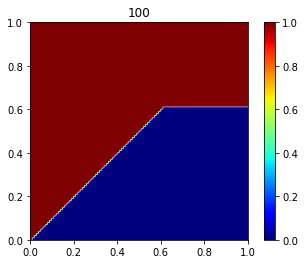

Number of samples = 150,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/438]	Train Loss: 0.6914 	Val Loss: 0.6883
Epoch 1 [200/438]	Train Loss: 0.6825 	Val Loss: 0.6746
Epoch 1 [300/438]	Train Loss: 0.6629 	Val Loss: 0.6541
Epoch 1 [400/438]	Train Loss: 0.6487 	Val Loss: 0.6462
Starting epoch 2
Epoch 2 [100/438]	Train Loss: 0.8929 	Val Loss: 0.6443
Epoch 2 [200/438]	Train Loss: 0.6454 	Val Loss: 0.6443
Epoch 2 [300/438]	Train Loss: 0.6399 	Val Loss: 0.6438
Epoch 2 [400/438]	Train Loss: 0.6410 	Val Loss: 0.6440
Starting epoch 3
Epoch 3 [100/438]	Train Loss: 0.8917 	Val Loss: 0.6445
Epoch 3 [200/438]	Train Loss: 0.6393 	Val Loss: 0.6438
Epoch 3 [300/438]	Train Loss: 0.6408 	Val Loss: 0.6433
Epoch 3 [400/438]	Train Loss: 0.6450 	Val Loss: 0.6433
Starting epoch 4
Epoch 4 [100/438]	Train Loss: 0.8887 	Val Loss: 0.6429
Epoch 4 [200/438]	Train Loss: 0.6426 	Val Loss: 0.6431
Epoch 4 [300/438]	Train Loss: 0.6432 	Val Loss: 0.6427
Epoch 4 [400/438]	Train Loss: 0.6395 	Val Loss: 0.6425


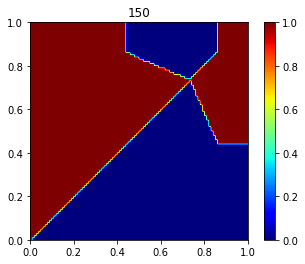

Number of samples = 200,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/942]	Train Loss: 0.6916 	Val Loss: 0.6893
Epoch 1 [200/942]	Train Loss: 0.6842 	Val Loss: 0.6765
Epoch 1 [300/942]	Train Loss: 0.6674 	Val Loss: 0.6552
Epoch 1 [400/942]	Train Loss: 0.6445 	Val Loss: 0.6372
Epoch 1 [500/942]	Train Loss: 0.6348 	Val Loss: 0.6343
Epoch 1 [600/942]	Train Loss: 0.6323 	Val Loss: 0.6342
Epoch 1 [700/942]	Train Loss: 0.6385 	Val Loss: 0.6341
Epoch 1 [800/942]	Train Loss: 0.6333 	Val Loss: 0.6335
Epoch 1 [900/942]	Train Loss: 0.6368 	Val Loss: 0.6337
Starting epoch 2
Epoch 2 [100/942]	Train Loss: 0.9001 	Val Loss: 0.6337
Epoch 2 [200/942]	Train Loss: 0.6327 	Val Loss: 0.6340
Epoch 2 [300/942]	Train Loss: 0.6394 	Val Loss: 0.6339
Epoch 2 [400/942]	Train Loss: 0.6361 	Val Loss: 0.6337
Epoch 2 [500/942]	Train Loss: 0.6328 	Val Loss: 0.6336
Epoch 2 [600/942]	Train Loss: 0.6329 	Val Loss: 0.6337
Epoch 2 [700/942]	Train Loss: 0.6355 	Val Loss: 0.6334
Epoch 2 [800/942]	Train Loss: 0.63

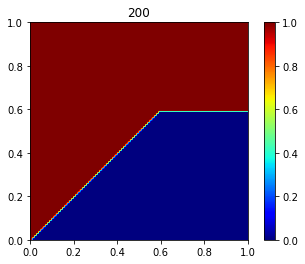

Number of samples = 250,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/1727]	Train Loss: 0.6952 	Val Loss: 0.6922
Epoch 1 [200/1727]	Train Loss: 0.6903 	Val Loss: 0.6874
Epoch 1 [300/1727]	Train Loss: 0.6804 	Val Loss: 0.6700
Epoch 1 [400/1727]	Train Loss: 0.6561 	Val Loss: 0.6460
Epoch 1 [500/1727]	Train Loss: 0.6386 	Val Loss: 0.6402
Epoch 1 [600/1727]	Train Loss: 0.6350 	Val Loss: 0.6385
Epoch 1 [700/1727]	Train Loss: 0.6411 	Val Loss: 0.6374
Epoch 1 [800/1727]	Train Loss: 0.6380 	Val Loss: 0.6369
Epoch 1 [900/1727]	Train Loss: 0.6361 	Val Loss: 0.6355
Epoch 1 [1000/1727]	Train Loss: 0.6379 	Val Loss: 0.6347
Epoch 1 [1100/1727]	Train Loss: 0.6390 	Val Loss: 0.6341
Epoch 1 [1200/1727]	Train Loss: 0.6356 	Val Loss: 0.6322
Epoch 1 [1300/1727]	Train Loss: 0.6274 	Val Loss: 0.6313
Epoch 1 [1400/1727]	Train Loss: 0.6304 	Val Loss: 0.6304
Epoch 1 [1500/1727]	Train Loss: 0.6322 	Val Loss: 0.6298
Epoch 1 [1600/1727]	Train Loss: 0.6258 	Val Loss: 0.6295
Epoch 1 [1700/1727]	Train Lo

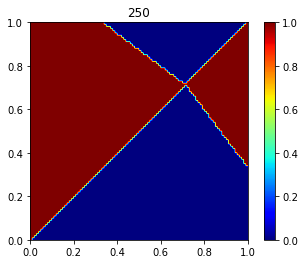

Number of samples = 300,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/2856]	Train Loss: 0.6916 	Val Loss: 0.6895
Epoch 1 [200/2856]	Train Loss: 0.6876 	Val Loss: 0.6855
Epoch 1 [300/2856]	Train Loss: 0.6818 	Val Loss: 0.6774
Epoch 1 [400/2856]	Train Loss: 0.6703 	Val Loss: 0.6616
Epoch 1 [500/2856]	Train Loss: 0.6518 	Val Loss: 0.6435
Epoch 1 [600/2856]	Train Loss: 0.6394 	Val Loss: 0.6348
Epoch 1 [700/2856]	Train Loss: 0.6284 	Val Loss: 0.6314
Epoch 1 [800/2856]	Train Loss: 0.6289 	Val Loss: 0.6304
Epoch 1 [900/2856]	Train Loss: 0.6324 	Val Loss: 0.6296
Epoch 1 [1000/2856]	Train Loss: 0.6305 	Val Loss: 0.6289
Epoch 1 [1100/2856]	Train Loss: 0.6307 	Val Loss: 0.6282
Epoch 1 [1200/2856]	Train Loss: 0.6265 	Val Loss: 0.6275
Epoch 1 [1300/2856]	Train Loss: 0.6288 	Val Loss: 0.6270
Epoch 1 [1400/2856]	Train Loss: 0.6315 	Val Loss: 0.6266
Epoch 1 [1500/2856]	Train Loss: 0.6300 	Val Loss: 0.6257
Epoch 1 [1600/2856]	Train Loss: 0.6285 	Val Loss: 0.6253
Epoch 1 [1700/2856]	Train Lo

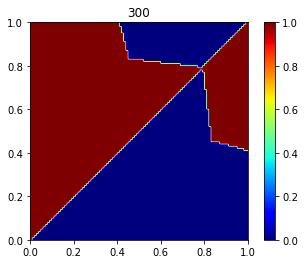

Number of samples = 350,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/4388]	Train Loss: 0.6928 	Val Loss: 0.6916
Epoch 1 [200/4388]	Train Loss: 0.6870 	Val Loss: 0.6793
Epoch 1 [300/4388]	Train Loss: 0.6690 	Val Loss: 0.6563
Epoch 1 [400/4388]	Train Loss: 0.6471 	Val Loss: 0.6364
Epoch 1 [500/4388]	Train Loss: 0.6315 	Val Loss: 0.6286
Epoch 1 [600/4388]	Train Loss: 0.6195 	Val Loss: 0.6265
Epoch 1 [700/4388]	Train Loss: 0.6236 	Val Loss: 0.6264
Epoch 1 [800/4388]	Train Loss: 0.6318 	Val Loss: 0.6267
Epoch 1 [900/4388]	Train Loss: 0.6220 	Val Loss: 0.6264
Epoch 1 [1000/4388]	Train Loss: 0.6331 	Val Loss: 0.6266
Epoch 1 [1100/4388]	Train Loss: 0.6270 	Val Loss: 0.6260
Epoch 1 [1200/4388]	Train Loss: 0.6244 	Val Loss: 0.6265
Epoch 1 [1300/4388]	Train Loss: 0.6254 	Val Loss: 0.6263
Epoch 1 [1400/4388]	Train Loss: 0.6266 	Val Loss: 0.6262
Epoch 1 [1500/4388]	Train Loss: 0.6252 	Val Loss: 0.6264
Epoch 1 [1600/4388]	Train Loss: 0.6266 	Val Loss: 0.6263
Epoch 1 [1700/4388]	Train Lo

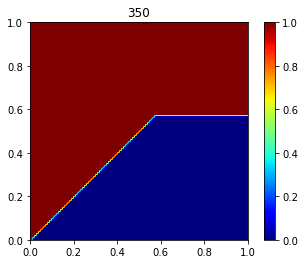

Number of samples = 400,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/6392]	Train Loss: 0.6984 	Val Loss: 0.6942
Epoch 1 [200/6392]	Train Loss: 0.6901 	Val Loss: 0.6847
Epoch 1 [300/6392]	Train Loss: 0.6767 	Val Loss: 0.6685
Epoch 1 [400/6392]	Train Loss: 0.6607 	Val Loss: 0.6518
Epoch 1 [500/6392]	Train Loss: 0.6454 	Val Loss: 0.6400
Epoch 1 [600/6392]	Train Loss: 0.6393 	Val Loss: 0.6339
Epoch 1 [700/6392]	Train Loss: 0.6312 	Val Loss: 0.6301
Epoch 1 [800/6392]	Train Loss: 0.6280 	Val Loss: 0.6280
Epoch 1 [900/6392]	Train Loss: 0.6262 	Val Loss: 0.6267
Epoch 1 [1000/6392]	Train Loss: 0.6294 	Val Loss: 0.6261
Epoch 1 [1100/6392]	Train Loss: 0.6213 	Val Loss: 0.6254
Epoch 1 [1200/6392]	Train Loss: 0.6267 	Val Loss: 0.6253
Epoch 1 [1300/6392]	Train Loss: 0.6226 	Val Loss: 0.6249
Epoch 1 [1400/6392]	Train Loss: 0.6185 	Val Loss: 0.6249
Epoch 1 [1500/6392]	Train Loss: 0.6239 	Val Loss: 0.6248
Epoch 1 [1600/6392]	Train Loss: 0.6280 	Val Loss: 0.6249
Epoch 1 [1700/6392]	Train Lo

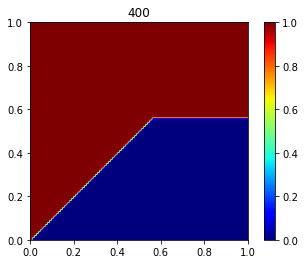

In [4]:
## Run feedback loop

comparisons_data = None
samples = {}
reward_fns = {}

for n in n_samples:
    print(f"Number of samples = {n}", end=",")
    # Learn reward function from samples and feedback from comparison function
    reward_cfg = make_reward_cfg(n)
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)

    # Store reward function
    reward_fns[n] = reward_fn

    # plot_sampler_1(samples[i], title=str(i), n=1000)
    vis_fn(reward_fns[n], title=str(n))

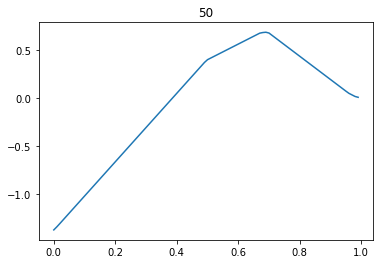

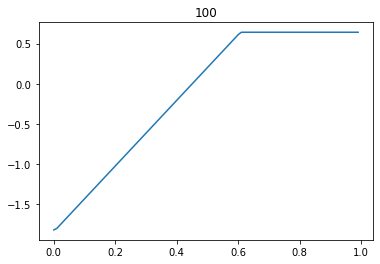

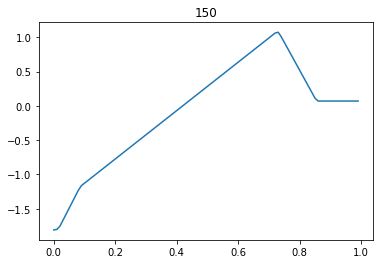

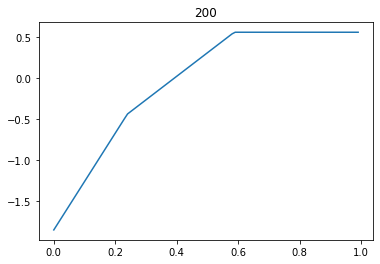

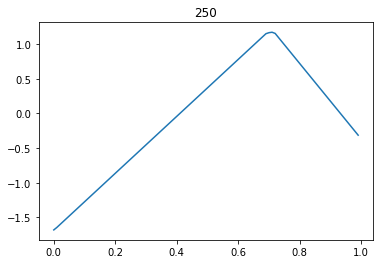

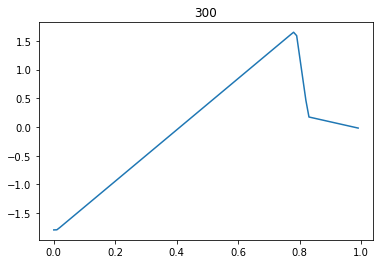

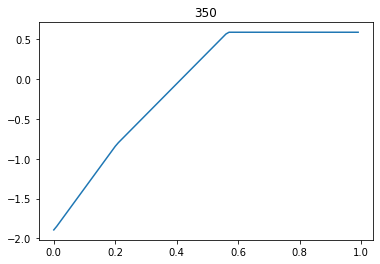

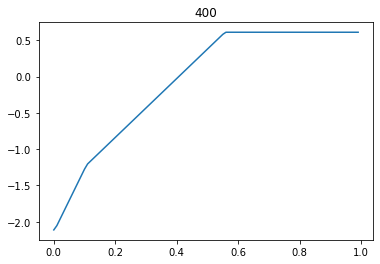

In [6]:
for n in n_samples:
    plot_fn_1(reward_fns[n], title=str(n))

In [18]:
# vis_fn(reward_fns[0], title="Learnt reward function")
# plot_fn_1(reward_fns[0], title="Learnt reward function", x_range=[0,1], x_step=0.01)

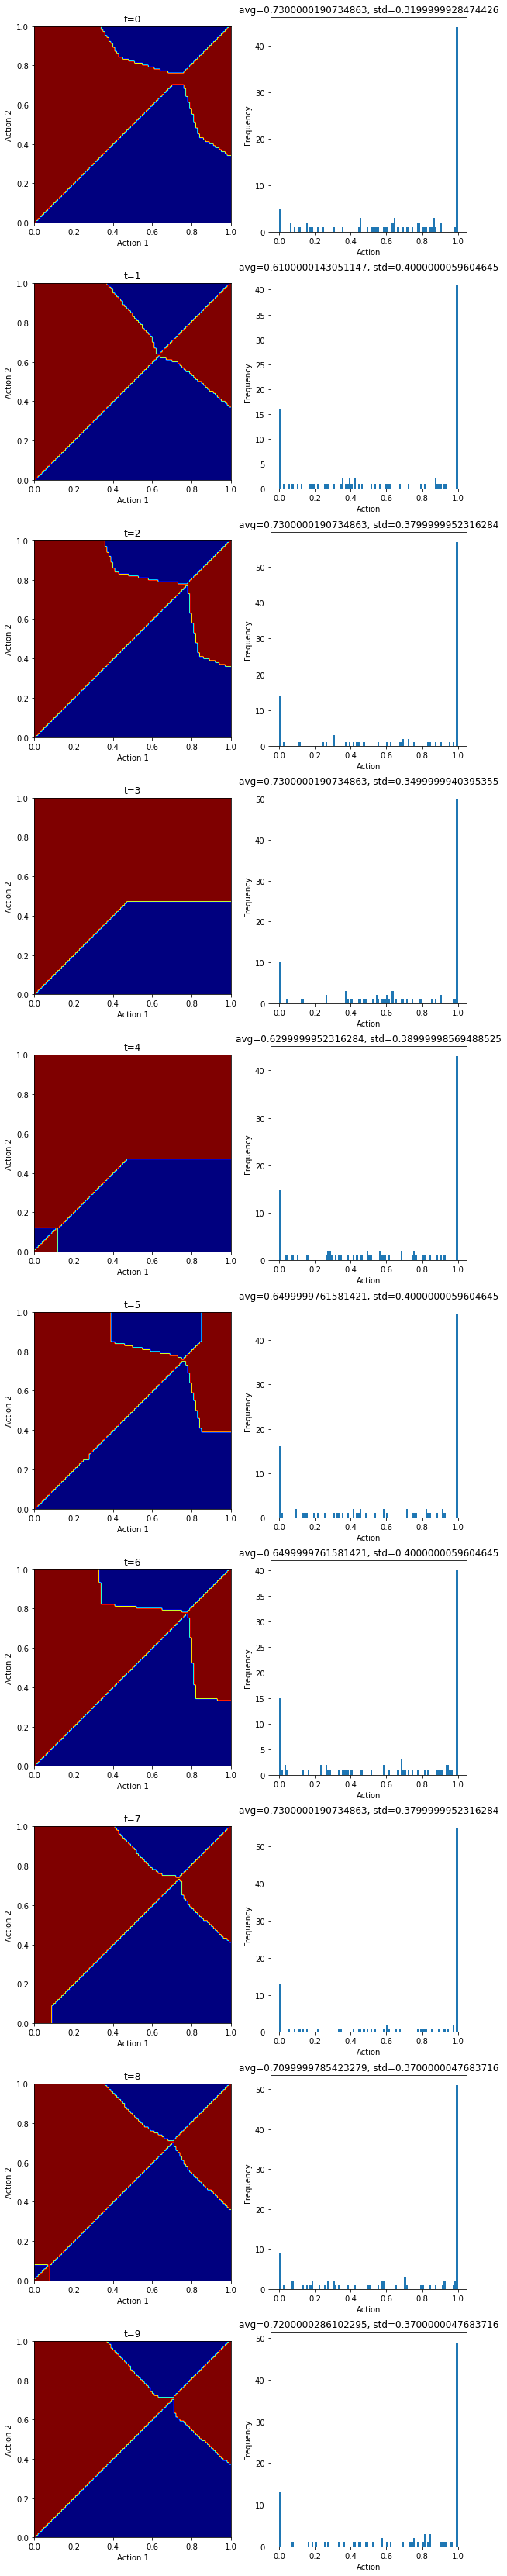

<Figure size 432x288 with 0 Axes>

In [19]:
# # Visualize results

# visualize_res_1(reward_fns, samples, figsize=(10,6*iterations), save="1d_res", round=2)